# table of contents
- ### [Data cleaning](#cleaning)
- ### [Preprocessing](#preprocessing)
  - ### [OneHotEncoder](#onehot)
  - ### [StandardScaler](#standard)
  - ### [LabelBinarizer](#label)
- ### [SelectKBest](#kbest)
- ### [KNN](#knn)
- ### [Decision tree](#tree)
- ### [Random Forest](#forest)

In [1]:
import pandas as pd
import numpy as np

df_telecoms = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_fin.csv")

## Data cleaning<a id="cleaning">

In [2]:
df_telecoms.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df_telecoms.shape

(6295, 21)

In [4]:
df_telecoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6295 non-null   object 
 1   gender            6295 non-null   object 
 2   SeniorCitizen     6295 non-null   int64  
 3   Partner           6295 non-null   object 
 4   Dependents        6295 non-null   object 
 5   tenure            6295 non-null   int64  
 6   PhoneService      6295 non-null   object 
 7   MultipleLines     6295 non-null   object 
 8   InternetService   6295 non-null   object 
 9   OnlineSecurity    6295 non-null   object 
 10  OnlineBackup      6295 non-null   object 
 11  DeviceProtection  6295 non-null   object 
 12  TechSupport       6295 non-null   object 
 13  StreamingTV       6295 non-null   object 
 14  StreamingMovies   6295 non-null   object 
 15  Contract          6295 non-null   object 
 16  PaperlessBilling  6295 non-null   object 


In [5]:
df_telecoms = df_telecoms[~df_telecoms.TotalCharges.str.contains(" ")]
df_telecoms["TotalCharges"] = pd.to_numeric(df_telecoms["TotalCharges"])

In [6]:
df_telecoms = df_telecoms.drop(["customerID"], axis=1)

In [7]:
print(df_telecoms.gender.value_counts())
print(df_telecoms.SeniorCitizen.value_counts())
print(df_telecoms.Partner.value_counts())
print(df_telecoms.Dependents.value_counts())
print(df_telecoms.PhoneService.value_counts())
print(df_telecoms.MultipleLines.value_counts())
print(df_telecoms.InternetService.value_counts())
print(df_telecoms.OnlineSecurity.value_counts())
print(df_telecoms.OnlineBackup.value_counts())
print(df_telecoms.DeviceProtection.value_counts())
print(df_telecoms.TechSupport.value_counts())
print(df_telecoms.StreamingTV.value_counts())
print(df_telecoms.Contract.value_counts())
print(df_telecoms.PaperlessBilling.value_counts())
print(df_telecoms.PaymentMethod.value_counts())

Male      3161
Female    3126
Name: gender, dtype: int64
0    5277
1    1010
Name: SeniorCitizen, dtype: int64
No     3245
Yes    3042
Name: Partner, dtype: int64
No     4415
Yes    1872
Name: Dependents, dtype: int64
Yes    5672
No      615
Name: PhoneService, dtype: int64
No                  3041
Yes                 2631
No phone service     615
Name: MultipleLines, dtype: int64
Fiber optic    2736
DSL            2182
No             1369
Name: InternetService, dtype: int64
No                     3115
Yes                    1803
No internet service    1369
Name: OnlineSecurity, dtype: int64
No                     2756
Yes                    2162
No internet service    1369
Name: OnlineBackup, dtype: int64
No                     2767
Yes                    2151
No internet service    1369
Name: DeviceProtection, dtype: int64
No                     3108
Yes                    1810
No internet service    1369
Name: TechSupport, dtype: int64
No                     2508
Yes                

<AxesSubplot:>

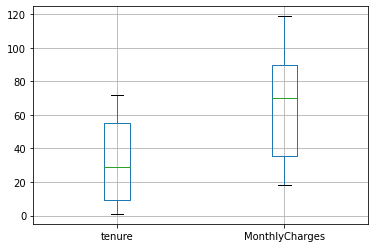

In [8]:
df_telecoms[["tenure", "MonthlyCharges"]].boxplot()

<AxesSubplot:>

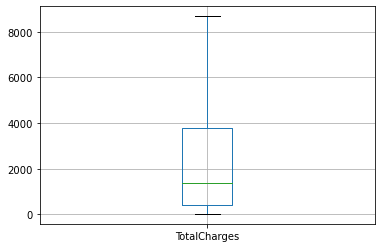

In [9]:
df_telecoms[["TotalCharges"]].boxplot()

## Preprocessing<a id="preprocessing">

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
numerical_col = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
df_categorical = df_telecoms.drop(numerical_col,axis=1)
df_categorical = df_categorical.drop('Churn',axis=1)

In [12]:
df_numerical = df_telecoms.drop(df_categorical.columns,axis=1)
df_numerical = df_numerical.drop('Churn',axis=1)

In [13]:
df_labels=df_telecoms['Churn']

In [14]:
X_categ = df_categorical.to_numpy()
X_num = df_numerical.to_numpy()
X = np.hstack((X_categ, X_num))
y = df_labels.to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2,stratify=df_telecoms['Churn'])

### OneHotEncoder <a id="onehot">

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
X_train_categ = X_train[ :,0:15]
X_train_num = X_train[ :,15:19]

In [18]:
hot_encoder = OneHotEncoder(sparse=False)
X_train_categ = hot_encoder.fit_transform(X_train_categ)

In [19]:
hot_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

#### StandardScaler<a id="standard">

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train_num)

In [22]:
X_train = np.hstack((X_train_categ, X_train_num))
X_train.shape

(4400, 45)

#### LabelBinarizer<a id="label">

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [24]:
binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train)

In [25]:
X_test_categ = X_test[ :,0:15]
X_test_num = X_test[ :,15:19]
X_test_categ = hot_encoder.transform(X_test_categ)

In [26]:
X_test_num = scaler.transform(X_test_num)

In [27]:
X_test = np.hstack((X_test_categ, X_test_num))
X_test.shape

(1887, 45)

In [28]:
y_test = binarizer.transform(y_test)

### SelectKBest<a id="kbest">

In [29]:
from sklearn.feature_selection import SelectKBest,chi2

In [30]:
kBest = SelectKBest(chi2, k=30).fit(X_train, y_train)
kBest.get_support(indices=True)

array([ 2,  3,  5, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 27,
       29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44], dtype=int64)

In [31]:
X_train = kBest.transform(X_train)
X_test = kBest.transform(X_test)

### KNN<a id="knn">

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {"n_neighbors":range(1,21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters)
grid_search.fit(X_train, y_train)

C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [34]:
grid_search.best_params_

{'n_neighbors': 18}

In [35]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"]).fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [37]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7768945416004239
0.5076023391812866
0.667037985243143
[[1249  136]
 [ 285  217]]


### Decision tree<a id="tree">

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
parameters = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"]}
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [40]:
grid_search.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [41]:
tree = DecisionTreeClassifier(criterion=grid_search.best_params_["criterion"], splitter=grid_search.best_params_["splitter"]).fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7307896131425543
0.492
0.6540451910768478
[[1133  252]
 [ 256  246]]


### Random Forest<a id="forest">

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
parameters = {"n_estimators": range(10,200,10), "criterion": ["gini", "entropy"]}
r_forest = RandomForestClassifier()
grid_search = GridSearchCV(r_forest, parameters)
grid_search.fit(X_train, y_train)

C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\JULIEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(10, 200, 10)})

In [45]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 40}

In [46]:
r_forest = RandomForestClassifier(criterion=grid_search.best_params_["criterion"], n_estimators=grid_search.best_params_["n_estimators"]).fit(X_train, y_train)
y_pred = r_forest.predict(X_test)

<ipython-input-46-d8bbb18b1a27>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_forest = RandomForestClassifier(criterion=grid_search.best_params_["criterion"], n_estimators=grid_search.best_params_["n_estimators"]).fit(X_train, y_train)


In [47]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7673555908850026
0.4936562860438293
0.6586347749795044
[[1234  151]
 [ 288  214]]
